In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Creaing the model over here
 (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

x_train = np.expand_dims(x_train, axis=-1) # adding one dimention to it in the end after the pixels to channel the data
x_test = np.expand_dims(x_test, axis=-1)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [ ]:
# Here we are creating 2 models
# 1st : Encoder
# 2nd : Decoder

encoder = models.Sequential([layers.InputLayer(input_shape=(28, 28, 1)), #input layer NOTE : Detecting feaures happens in Conv layer only
                             layers.Conv2D(32, (3,3), activation='relu', strides=2, padding='same'), # convoultion layers 32-> nor of filters (3,3)-> kernel size strides=2 -> how we are moving out filter 1pxil or 2 pixl like wise
                             layers.Conv2D(64, (3,3), activation='relu', strides=2, padding='same'), # convoultion layers
                             layers.Flatten(), # compressing the data (encoder) and converting it to 1D layer before we pass it to output layer
                             layers.Dense(64, activation='relu')]) # output layer (Dense layer expect the input in 1D) to get the smaller output at the end we Dense layer at last

decoder = models.Sequential([layers.InputLayer(input_shape=(64, )),
                             layers.Dense(7*7*64, activation='relu'), # decompressing the data
                             layers.Reshape((7, 7, 64)),
                             layers.Conv2DTranspose(64, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2DTranspose(32, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2DTranspose(1, (3,3), activation='sigmoid',padding='same')])

autoencoder = models.Sequential([encoder, decoder])
autoencoder.summary()


# NOTE : decoder to the opposite work of encoder

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
encoder.summary()

# how we got 200,768 ?
# we got 3136 flatten data and we add + 1 bias to it
# per neuron we have -> 3137 parameters
# where in the input of dense we add 64 neurons
# 64 x 3137 = 200768

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,584 (857.75 KB)

 Trainable params: 219,584 (857.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 3136)           │       203,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,521 (1013.75 KB)

 Trainable params: 259,521 (1013.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # compling the data

In [ ]:
# Training the model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

# here we checking our rebuilt img should be same as my input img i/p = o/p






Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 196ms/step - loss: 0.2697 - val_loss: 0.0876
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 193ms/step - loss: 0.0847 - val_loss: 0.0774
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 199ms/step - loss: 0.0760 - val_loss: 0.0728
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 146s 208ms/step - loss: 0.0726 - val_loss: 0.0711
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 91s 195ms/step - loss: 0.0709 - val_loss: 0.0694
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 201ms/step - loss: 0.0698 - val_loss: 0.0689
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 104s 223ms/step - loss: 0.0691 - val_loss: 0.0683
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - loss: 0.0687 - val_loss: 0.0678
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 195ms/step - loss: 0.0683 - val_loss: 0.0676
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 188ms/step - loss: 0.0679 - val_loss: 0.0674


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


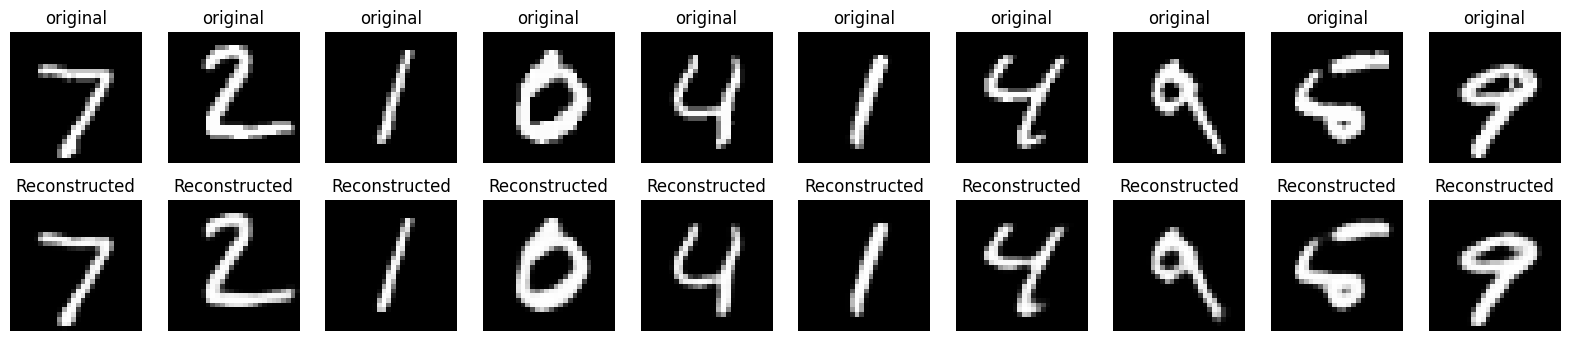

In [ ]:
# Here we are decoding the imgs and predicting the imgs
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
  plt.title("original")
  plt.gray()
  plt.axis("off")

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
  plt.title("Reconstructed")
  plt.gray()
  ax.axis("off")

plt.show()